In [49]:
import math
import numpy as np
# print(np.__version__)
import matplotlib.pyplot as plt
%matplotlib inline


In [50]:
def f(x):
    return 3*x**2 - 4*x + 5


In [51]:
f(3.0)

20.0

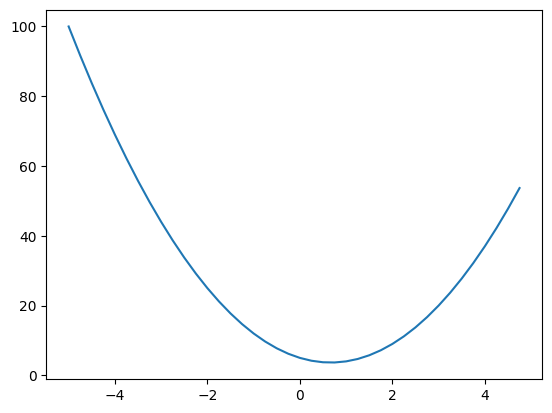

In [52]:
xs = np.arange(-5, 5, 0.25)
ys=f(xs)
plt.plot(xs,ys)

In [53]:
h=0.000001
x=2/3
(f(x+h)-f(x))/h # value of slope at x

2.999378523327323e-06

In [54]:
#lets get more complex
a = 2.0
b = -3.0
c = 10.0
d = a*b + c
print (d)

4.0


In [55]:
h = 0.0001

#inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b + c
c+=h
d2 = a*b + c

print("d1",d1)
print("d2",d2)
print("slope",(d2-d1)/h) 

d1 4.0
d2 4.0001
slope 0.9999999999976694


In [87]:
class Value:

    def __init__(self,data, _children=(), _op='', label=''):
        self.data = data #takes and keeps track of a single scalar value
        self.grad = 0.0 #assuming that every value does not affect the output
        self._prev = set(_children) #this shows the operands that were used to create this number. Returns empty set in case of leaf nodes.
        self._op= _op #stores operator which was used to create this number.
        self.label=label #shows what will be written along with the value.

        # if a+b = c,
        # prev of c ={a,b}

        #label : Something that highlights with the value of self in the propagation tree


    def __repr__(self):
        return f"Value data={self.data}"
    
    #we have to use double underscore in python to define these operators of these objects in python 
    #If we don't use them, python cannot arthematically operate on two value objects
    def __add__(self,other):
        out=Value(self.data + other.data, (self,other),'+')
        return out


    def __mul__(self,other):
        out=Value(self.data * other.data, (self,other),'*')
        return out
    

a=Value(2.0,label='a')
b=Value(-3.0, label='b')
c=Value(10.0, label='c')
e=a*b; e.label='e'
d=e+c; d.label='d'
f=Value(-2.0, label='f')
L=d*f; L.label="L"
print(L)

#d=(a.__mul__(b)).__add__(c)

 
# NOTE:
# a+b (without defining __add__  => TypeError)
# after defining __add__
# a+b is interpreted as
# # a.__add__(b)
# where a is self and b is other


Value data=-8.0


In [88]:
from graphviz import Digraph

def trace(root):
    # builds a set of all nodes and edges in a graph
    #created set named nodes and edges to store their values
    #nodes : neurons which store values, consider their weighted sum and bias with the initial input and give output to next layer
    #edges : tells us about the connections between two nodes
    nodes, edges = set(), set()

    #build is run as a recursion function from final output all the way to initial values i.e back propagation
    #if the node is not in the set node then its added into the set
    #and it adds the prev of the current node to edges highlighting relation between them
    def build(v): # v=4.0
        if v not in nodes:
            nodes.add(v) #nodes={4.0}
            for child in v._prev:
                edges.add((child, v)) #edges={{10.0,4.0},{-6.0,4.0}}
                build(child) #first build(10.0) and then build(-6.0) or vice versa

    build(root) #root => d=4.0
    return nodes, edges #this will return all the nodes and edges in two different sets


def draw_dot(root):
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'})
    # •	Creates a directed graph
	# •	LR = Left → Right layout
	# •	Output format = SVG (clean visuals)


    nodes, edges = trace(root)
    for n in nodes: # since first element of n is 4.0 lets take n=4.0
        uid = str(id(n))
        # id(n) gives a unique memory address
	    # Graphviz needs unique string IDs


        # for any value (in this case 4.0) in the graph, create a rectangular ('record') node for it
        dot.node(name=uid,label="{ %s | data %.4f | grad %.4f }" % (n.label,n.data,n.grad),shape='record' )

        if n._op:
            # if this value is a result of some operation, create an op node for it (in this case: + inside an oval)
            dot.node(name=uid + n._op, label=n._op)
            # if uid of 4.0 ==> 45234315 then uid of + ==> 45234315+

            # and connect this node to the value of n ( + --> 4.0 )
            dot.edge(uid + n._op, uid)

    for n1, n2 in edges:
        #remember we had {10,4} {-6,4} ...... in set named edges??
        #this loop will create edges between input nodes (i.e 10,-6) with operator of its output node (+)
        # 10.0 --> 4.0 and -6.0 --> 4.0

        # n1:input node
        # n2:output node
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
        

    return dot 
    #dot is the object that we created in class digraph which stores this entire graphical representation of this mathematical expression.


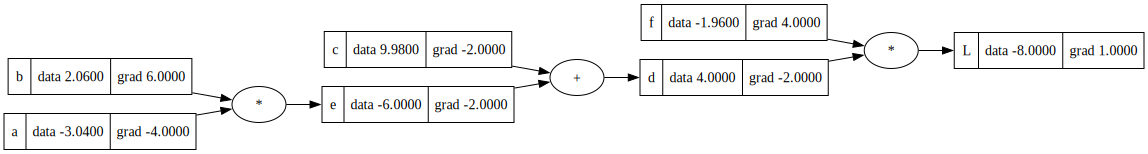

In [124]:
draw_dot(L)

In [119]:
# L.grad = 1.0 
#since, change of L wrt L = 1

# we know that l=d*f
# from basic integration, we know that dL/dd = f

# d.grad = f.data
# f.grad = d.data

#we know that d=c+e
# dd/dc =1
# and we also know that dL/dd * dd/dc = dL/dc
# from given equaiton dL/dc= d.grad * 1
# c.grad = d.grad

#Similarly,
# dd/de =1
# and we also know that dL/dd * dd/de = dL/de
# from given equaiton dL/de= d.grad * 1
# e.grad = d.grad

#now lets calculate dL/da and dL/db
#from chain rule we figured out,
#dL/da=dL/dd * dd/de * de/da
#dL/da=f.data * 1 * b.data
# a.grad=f.data * b.data
# b.grad=f.data * a.data

In [101]:
#NOTE:
#We need to find the derivative of L wrt,
#a,b,c,d,e,f
#we adjust a,b,c,f to adjust values of L
#we are interested in finding out derivative of L wrt,
#1. the leaf nodes(c,f)
#2. the input values(a,b)

In [125]:
#Trying to increase value of L by nudging the values of nodes(a,b,c,f)
a.data+=0.01 * a.grad
b.data+=0.01 * b.grad
c.data+=0.01 * c.grad
f.data+=0.01 * f.grad

e = a * b
d = e + c
L = d * f

print(L.data)

-6.586368000000001


In [123]:

def lol():

    h=0.0001

    a=Value(2.0,label='a')
    b=Value(-3.0, label='b')
    c=Value(10.0, label='c')
    
    e=a*b; e.label='e'
    d=e+c; d.label='d'
    f=Value(-2.0, label='f') 
    L=d*f; L.label="L"
    L1=L.data

    a=Value(2.0,label='a') 
    #increasing value of a by h
    # a.data+=h
    b=Value(-3.0, label='b')
    #increasing value of b by h
    # b.data+=h
    c=Value(10.0, label='c')
    # c.data+=h
    e=a*b; e.label='e'
    # e.data+=h
    d=e+c; d.label='d'
    f=Value(-2.0, label='f') 
    L=d*f; L.label="L"
    L2 = L.data

    print((L2-L1)/h) #derivative of L wrt , cus we bumped up a's value by h
 
lol()

0.0


In [ ]:
plt.plot(np.arange(-5,5,0.2), np.tanh(np.arange))